<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#-Homework-2-(Topics-5-7:-Groupby,-Merge,-Visualization)" data-toc-modified-id="-Homework-2-(Topics-5-7:-Groupby,-Merge,-Visualization)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span><center> Homework 2 (Topics 5-7: Groupby, Merge, Visualization)</center></a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Task-0." data-toc-modified-id="Task-0.-1.0.0.1"><span class="toc-item-num">1.0.0.1&nbsp;&nbsp;</span>Task 0.</a></span></li><li><span><a href="#Task-1." data-toc-modified-id="Task-1.-1.0.0.2"><span class="toc-item-num">1.0.0.2&nbsp;&nbsp;</span>Task 1.</a></span></li><li><span><a href="#Task-2:" data-toc-modified-id="Task-2:-1.0.0.3"><span class="toc-item-num">1.0.0.3&nbsp;&nbsp;</span>Task 2:</a></span></li><li><span><a href="#Task-3:" data-toc-modified-id="Task-3:-1.0.0.4"><span class="toc-item-num">1.0.0.4&nbsp;&nbsp;</span>Task 3:</a></span></li><li><span><a href="#Task-4:" data-toc-modified-id="Task-4:-1.0.0.5"><span class="toc-item-num">1.0.0.5&nbsp;&nbsp;</span>Task 4:</a></span></li><li><span><a href="#Task-5:" data-toc-modified-id="Task-5:-1.0.0.6"><span class="toc-item-num">1.0.0.6&nbsp;&nbsp;</span>Task 5:</a></span></li><li><span><a href="#Вопросы:" data-toc-modified-id="Вопросы:-1.0.0.7"><span class="toc-item-num">1.0.0.7&nbsp;&nbsp;</span>Вопросы:</a></span></li><li><span><a href="#Task-6:" data-toc-modified-id="Task-6:-1.0.0.8"><span class="toc-item-num">1.0.0.8&nbsp;&nbsp;</span>Task 6:</a></span></li><li><span><a href="#Вопросы:" data-toc-modified-id="Вопросы:-1.0.0.9"><span class="toc-item-num">1.0.0.9&nbsp;&nbsp;</span>Вопросы:</a></span></li></ul></li></ul></li></ul></li></ul></div>

# <center> Homework 2 (Topics 5-7: Groupby, Merge, Visualization)

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Ещё раз (как и в задании 1) считайте в переменные tr_mcc_codes, tr_types, transactions и customers_gender_train. В transactions опять считайте только первые 1000000 строк.

In [2]:
### Type your code here
tr_mcc_codes = pd.read_csv("../data/tr_mcc_codes.csv", sep=';')
tr_types = pd.read_csv("../data/tr_types.csv", sep=';')
customers_gender_train = pd.read_csv("../data/gender_train.csv", sep=',')
transactions = pd.read_csv("../data/transactions.csv", sep=',').iloc[0:1000000]

#### Task 0.
Соедините transactions с всеми остальными таблицами (tr_mcc_codes, tr_types, gender_train). Причём с customers_gender_train необходимо смёрджиться с помощью left join, а с оставшимися датафреймами - через inner.
После получения результата таблицы gender_train, tr_types, tr_mcc_codes можно удалить. В результате соединения датафреймов должно получиться 999584 строки.

In [3]:
### Type your code here
first = pd.merge(transactions, customers_gender_train, how='left')
two = pd.merge(first, tr_mcc_codes, how='inner')
df = pd.merge(two, tr_types, how='inner')
df.shape

(999584, 9)

In [4]:
df.head()

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id,gender,mcc_description,tr_description
0,39026145,0 10:23:26,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ
1,39026145,6 07:08:31,4814,1030,-5614.79,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ
2,39026145,8 07:06:10,4814,1030,-1122.96,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ
3,39026145,11 08:49:03,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ
4,39026145,11 14:12:08,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ


#### Task 1.
1. Определите модуль разницы между средними тратами женщин и мужчин (трата - отрицательное значение amount). (*)

Выведите ответ в виде вещественного числа, округлённого до двух знаков после запятой, отделив дробную часть точкой в формате "123.45"

##### Пояснения:
(\*) Если в результате для мужчин получились значения [-1,-3,-5], а для женщин [-1,-2,-3],  
то модуль разницы между средними арифметическими -3 и -2 будет равен 1.

(\**) Обратите внимание, что для вычисления модуля разности точных знаний о том,  
какой класc относится к мужчинам, а какой - к женщинам, пока не требуется.

(\***) Округление не нужно производить отдельно по средним тратам женщин и мужчин, а только в самом конце, когда получите значение модуля разницы трат.

In [5]:
### Type your code here
groups = df.query('amount < 0').groupby(['gender'])
groups.size()

gender
0.0    219410
1.0    209355
dtype: int64

In [6]:
groups.amount.mean()

gender
0.0   -53376.917122
1.0   -86094.972042
Name: amount, dtype: float64

In [7]:
-53376.917122-(-86094.972042)

32718.054919999995

#### Task 2:
1. Создайте новый столбец - mcc_code+tr_type, сконкатенировав значения из соответствующих столбцов. (\*)
2. Оставьте только наблюдения с отрицательным значением amount. Посчитайте дисперсию по категориям получившегося столбца mcc_code+tr_type, в которых количество наблюдений >= 10. 
3. Определите отношение максимальной дисперсии к минимальной.

Выведите ответ в виде вещественного числа, округлённого до ближайшего целого в формате "123456" без дробной части.

##### Пояснения:
(\*) Для конкатенации значений в столбцах можно использовать метод .astype(str) для серии и складывать соответствующие серии. Либо же применять apply к строкам датафрейма, прописывая логику преобразования и конкатенации значений внутри.

(\**) Для одновременного подсчета количества наблюдений и дисперсии по категориям можно воспользоваться функцией .agg()

In [8]:
### Type your code here
df['mcc_code_and_tr_type'] = df['mcc_code'].astype(str) + df['tr_type'].astype(str)
df.query('amount < 0').groupby(['mcc_code_and_tr_type'])['amount'] \
                                  .agg(['count', 'var']) \
                                  .query('count >= 10')['var'] \
                                  .agg(lambda x: round(max(x) / min(x)))
#верно

9170599

#### Task 3:
1. По всем типам транзакций рассчитайте максимальную сумму прихода на карту (из строго положительных сумм по столбцу amount) отдельно для мужчин и женщин (назовите ее "max_income"). Оставьте по 5 транзакций для мужчин и для женщин, наименьших среди всех транзакций по полученным значениям "max_income". (\*)
2. Выделите среди них те, которые встречаются одновременно и у мужчин, и у женщин:
    - 1) Покупка. POS ТУ СБ РФ	
    - 2) Списание после проведения претензионной работы	
    - 3) Плата за получение наличных. Россия	
    - 4) Перевод на карту/ с карты через АТМ (со взиманием комиссии с отправителя) по счету в овердрафте	
    - 5) Плата за получение наличных в АТМ. Россия	 
    - 6) Наличные. Зарубеж. банк	
    - 7) Возврат покупки. POS ТУ Россия

##### Пояснения:
(\*) Если максимальные суммы приходов по каким-то типам были равны [1,2,3,4,5,6,7,8], то 5 минимальных из них: [1,2,3,4,5]

In [41]:
### Type your code here
df.head()

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id,gender,mcc_description,tr_description,mcc_code_and_tr_type,max_income,tr_day
0,39026145,0 10:23:26,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,48141030,NaN,0
1,39026145,6 07:08:31,4814,1030,-5614.79,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,48141030,NaN,6
2,39026145,8 07:06:10,4814,1030,-1122.96,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,48141030,NaN,8
3,39026145,11 08:49:03,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,48141030,NaN,11
4,39026145,11 14:12:08,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,48141030,NaN,11


In [39]:
a = pd.DataFrame({'tr_type': df['tr_type'],
                   'amount': df['amount']})
a['max_income'] = a.query('amount > 0').groupby('tr_type').transform(max)
df['max_income'] = a['max_income']

def top(df, n=5, column='amount'):
    return df.sort_values(by=column)[-n:]

b = df.query('amount > 0').groupby(['gender', 'tr_type']).apply(top)
df.set_index(["mcc_code", 'amount']).count(level="mcc_code").sort_values(by='mcc_description', ascending=False)

,customer_id,tr_datetime,tr_type,term_id,gender,mcc_description,tr_description,mcc_code_and_tr_type,max_income,tr_day
mcc_code,,,,,,,,,,
6011,199281,199281,199281,108531,110988,199281,199281,199281,30760,199281
6010,199266,199266,199266,116471,152726,199266,199266,199266,197167,199266
5411,144202,144202,144202,87674,79833,144202,144202,144202,130,144202
4814,120694,120694,120694,67789,68164,120694,120694,120694,5,120694
4829,77936,77936,77936,46841,44225,77936,77936,77936,34,77936
...,...,...,...,...,...,...,...,...,...,...
5697,3,3,3,2,1,3,3,3,0,3
9211,3,3,3,3,0,3,3,3,0,3
8244,3,3,3,0,3,3,3,3,0,3


In [11]:
c = b[b.gender==1.0].sort_values(by='max_income', ascending=False)
c

customer_id   tr_datetime  mcc_code  tr_type  \
gender tr_type                                                        
1.0    7070    807008      9497605  195 19:19:49      6010     7070   
               816947     26782922  151 11:35:44      6010     7070   
               809240     19950741  143 14:08:24      6010     7070   
               809242     19950741  144 10:00:50      6010     7070   
               809239     19950741  143 14:07:17      6010     7070   
...                            ...           ...       ...      ...   
       1010    386903      1521146  447 00:00:00      5411     1010   
               467805     40877619  456 00:00:00      4812     1010   
       4110    713725     11653939  404 00:00:00      6011     4110   
               713615     99048480  174 00:00:00      6011     4110   
       2020    802537     46579237  329 00:00:00      6010     2020   

                             amount   term_id  gender  \
gender tr_type                                          
1.0    7070    807008  3.593465e+07       NaN     1.0   
               816947  1.459845e+08       NaN     1.0   
               809240  1.347549e+08       NaN     1.0   
               809242  5.176836e+07       NaN     1.0   
               809239  4.491832e+07       NaN     1.0   
...                             ...       ...     ...   
       1010    386903  2.880387e+04  10001267     1.0   
               467805  6.513160e+03    405737     1.0   
       4110    713725  2.245920e+03  ATM90448     1.0   
               713615  2.245920e+03       NaN     1.0   
       2020    802537  2.245920e+03    170233     1.0   

                                                         mcc_description  \
gender tr_type                                                             
1.0    7070    807008   Финансовые институты — снятие наличности вручную   
               816947   Финансовые институты — снятие наличности вручную   
               809240   Финансовые институты — снятие наличности вручную   
               809242   Финансовые институты — снятие наличности вручную   
               809239   Финансовые институты — снятие наличности вручную   
...                                                                  ...   
       1010    386903                  Бакалейные магазины, супермаркеты   
               467805  Телекоммуникационное оборудование, включая про...   
       4110    713725  Финансовые институты — снятие наличности автом...   
               713615  Финансовые институты — снятие наличности автом...   
       2020    802537   Финансовые институты — снятие наличности вручную   

                                                          tr_description  \
gender tr_type                                                             
1.0    7070    807008  Перевод на карту (с карты) через Мобильный бан...   
               816947  Перевод на карту (с карты) через Мобильный бан...   
               809240  Перевод на карту (с карты) через Мобильный бан...   
               809242  Перевод на карту (с карты) через Мобильный бан...   
               809239  Перевод на карту (с карты) через Мобильный бан...   
...                                                                  ...   
       1010    386903                              Покупка. POS ТУ СБ РФ   
               467805                              Покупка. POS ТУ СБ РФ   
       4110    713725          Плата за получение наличных в АТМ. Россия   
               713615          Плата за получение наличных в АТМ. Россия   
       2020    802537                Выдача наличных через POS Сбербанка   

                      mcc_code_and_tr_type    max_income  
gender tr_type                                            
1.0    7070    807008             60107070  1.459845e+08  
               816947             60107070  1.459845e+08  
               809240             60107070  1.459845e+08  
               809242             60107070  1.459845e+08  
               809239    

In [12]:
d = b[b.gender==0.0].sort_values(by='max_income', ascending=False)
d

customer_id   tr_datetime  mcc_code  tr_type  \
gender tr_type                                                        
0.0    7070    923980     77695202  132 14:07:18      6010     7070   
               923979     77695202  115 16:34:59      6010     7070   
               923978     77695202  115 13:21:41      6010     7070   
               809118     34267056  140 01:14:33      6010     7070   
               810165     40917212   43 17:10:40      6010     7070   
...                            ...           ...       ...      ...   
       4100    718161     34267056  176 00:00:00      6011     4100   
               718160     34267056  176 00:00:00      6011     4100   
               718159     34267056  176 00:00:00      6011     4100   
       4110    713566     14808847   56 00:00:00      6011     4110   
       4051    782598     65368200  249 10:04:53      4829     4051   

                            amount   term_id  gender  \
gender tr_type                                         
0.0    7070    923980  61234893.52       NaN     0.0   
               923979  22459157.72       NaN     0.0   
               923978  15721410.40       NaN     0.0   
               809118  15721410.40       NaN     0.0   
               810165  67377473.16       NaN     0.0   
...                            ...       ...     ...   
       4100    718161      5041.86       NaN     0.0   
               718160      5041.86       NaN     0.0   
               718159      5041.86       NaN     0.0   
       4110    713566      2245.92       NaN     0.0   
       4051    782598      1122.96  10145755     0.0   

                                                         mcc_description  \
gender tr_type                                                             
0.0    7070    923980   Финансовые институты — снятие наличности вручную   
               923979   Финансовые институты — снятие наличности вручную   
               923978   Финансовые институты — снятие наличности вручную   
               809118   Финансовые институты — снятие наличности вручную   
               810165   Финансовые институты — снятие наличности вручную   
...                                                                  ...   
       4100    718161  Финансовые институты — снятие наличности автом...   
               718160  Финансовые институты — снятие наличности автом...   
               718159  Финансовые институты — снятие наличности автом...   
       4110    713566  Финансовые институты — снятие наличности автом...   
       4051    782598                                  Денежные переводы   

                                                          tr_description  \
gender tr_type                                                             
0.0    7070    923980  Перевод на карту (с карты) через Мобильный бан...   
               923979  Перевод на карту (с карты) через Мобильный бан...   
               923978  Перевод на карту (с карты) через Мобильный бан...   
               809118  Перевод на карту (с карты) через Мобильный бан...   
               810165  Перевод на карту (с карты) через Мобильный бан...   
...                                                                  ...   
       4100    718161                Плата за получение наличных. Россия   
               718160                Плата за получение наличных. Россия   
               718159                Плата за получение наличных. Россия   
       4110    713566          Плата за получение наличных в АТМ. Россия   
       4051    782598  Плата за перевод на карту (с карты) через АТМ ...   

                      mcc_code_and_tr_type    max_income  
gender tr_type                                            
0.0    7070    923980             60107070  1.459845e+08  
               923979             60107070  1.459845e+08  
               923978             60107070  1.459845e+08  
               809118             60107070  1.459845e+08  
               810165             6010

#### Task 4:
1. Выделите из поля tr_datetime относительный день tr_day (первое число до точного времени). (\*)
2. Отфильтруйте строки таким образом, чтобы оставить только те транзакции, у которых в соответствующий относительный день tr_day количество уникальных MCC кодов при транзакциях было больше 75 (можно воспользоваться функцией nunique())
3. Сгруппируйте полученный отфильтрованный датафрейм по MCC коду и полу, после чего, пронализировав результат, выберите верные варианты ответов ниже (\**): 
    - 1) gender == 0 - женщины, gender == 1 - мужчины
    - 2) gender == 1 - женщины, gender == 0 - мужчины
    - 3) Абсолютное значение медианы с типом "Флористика" (расходов/приходов) у мужчин выше той же медианы у женщин
    - 4) Абсолютное значение медианы женских трат (расходов/приходов) на ценные бумаги выше мужских
    - 5) Абсолютное значение медианы женских трат (расходов/приходов) в категории "Бары, коктейль-бары, дискотеки, ночные клубы и таверны — места продажи алкогольных напитков" ниже мужских
    
##### Пояснения:
(\*) Для того, чтобы выделить всё, что стоит до первого пробела, можо использовать строковые методы для датафрейма - .str.split(), например. Либо же реализовывать логику выделения подстроки с помощью метода apply. <br>
(\**) Понять, какой класс к какому типу транзакций (мужские/женские) относится можно, если поизучать типичные для мужчин/женщин категории и сравнить средние/медианы расходов и/или приходов в них.

In [42]:
### Type your code here
df['tr_day'] = df['tr_datetime'].str.split().apply(lambda x: int(x[0]))
df[df.groupby(['tr_day', 'mcc_code'])['mcc_code'].transform('size')>75]
#ответ 135

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id,gender,mcc_description,tr_description,mcc_code_and_tr_type,max_income,tr_day
0,39026145,0 10:23:26,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,48141030,NaN,0
1,39026145,6 07:08:31,4814,1030,-5614.79,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,48141030,NaN,6
2,39026145,8 07:06:10,4814,1030,-1122.96,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,48141030,NaN,8
3,39026145,11 08:49:03,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,48141030,NaN,11
4,39026145,11 14:12:08,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,48141030,NaN,11
...,...,...,...,...,...,...,...,...,...,...,...,...
998285,5205423,178 11:31:28,6010,7041,606397.26,NaN,NaN,Финансовые институты — снятие наличности вручную,Перевод на карту (с карты) через POS (из одног...,60107041,3368873.66,178
998286,76606773,370 07:05:51,6010,7041,11319.42,014337,0.0,Финансовые институты — снятие наличности вручную,Перевод на карту (с карты) через POS (из одног...,60107041,3368873.66,370
998287,15854896,109 13:41:04,6010,1000,-44117.20,NaN,1.0,Финансовые институты — снятие наличности вручную,Покупка.ТУ СБ РФ,60101000,NaN,109
998295,18654396,440 13:10:22,5411,6210,3897.56,931938,1.0,"Бакалейные магазины, супермаркеты",Возврат покупки.POS Зарубеж. ТУ,54116210,1206764.46,440


#### Task 5:
1. Разбейте расходы (отрицательные значения сумм) на 5 бакетов amount_bucket равного объёма (с помощью pd.qcut), разбив все траты на категории 'Very High', 'High', 'Middle', 'Low', 'Very Low'. (\*)
2. Оставшиеся неотрицательные траты отнесите к категории 'Income'.
(воспользуйтесь функцией .cat.add_categories('Income') для того, чтобы добавить новую категорию 'Income' к категориям 'Very High', 'High', 'Middle', 'Low', 'Very Low', а затем заполните пустые значения новой категорией).
3. Из поля tr_datetime выделите час tr_hour, в который произошла транзакция, как первые 2 цифры до ":". (\**)
3. После этого постройте сводную таблицу, значениями в которой является пол gender, индексы - tr_hour, столбцы - amount_bucket.
4. Отрисуйте полученные результаты, передав их в функцию plot_pivot_table, расположенную ниже.
5. Выберите верные ответы на вопросы ниже.

#### Вопросы:
    - 1) Ночные поступления денег (01-05 часов) в более чем 85% случаев являются мужскими.
    - 2) Посмотрев на долю мужчин в поступлениях средств (Income), можно сделать вывод, что количество поступлений средств женщинам в целом больше, чем мужчинам.
    - 3) Самые низкие траты в 3 часа ночи осуществляются в более 70% случаев женщинами.
    - 4) Существуют особые часы в мелких тратах, когда женщины тратят намного больше мужчин (>80%)
    - 5) Посмотрев на долю мужчин в максимальных тратах средств (Very High), можно сделать вывод, что количество высоких трат в каждый возможный час мужчин больше, чем у женщин.

##### Пояснения:
(\*) Обратите внимание, что в категории Very High Должны оказаться максимальные по модулю отрицательные транзакции. <br>
(\**) Например, для строки "0 10:23:26" час будет равен 10, а для строки "6 07:08:31"- 07. Можно воспользоваться функциями str.split() или str.find() и 
функцией .apply(lambda x: x[])

In [63]:
otric = df[df.amount<0].amount
 
df['amount_bucket'] = pd.qcut(otric,5,labels=['Very High','High','Middle','Low','Very Low'])
df['amount_bucket'] = df['amount_bucket'].cat.add_categories('Income').fillna('Income') 
 
hours = df['tr_datetime'].apply(lambda x: x.split()[1].split(':')[0])
amount_bucket = df['amount_bucket']
amount_bucket = np.array(amount_bucket.values)
gender = df['gender']
 
data = pd.DataFrame({'hours': hours.values,
                     'gender': gender.values,
                     'amount_bucket': amount_bucket})

data.gender = data.gender.astype(float)
data.hours = data.hours.astype(float)
frameNew = pd.pivot_table(data, index=['hours'], values='gender', columns=['amount_bucket'])
 
frameNew

amount_bucket,High,Income,Low,Middle,Very High,Very Low
hours,,,,,,
0.0,0.581928,0.737148,0.544178,0.530195,0.578957,0.517352
1.0,0.594737,0.965922,0.539936,0.578947,0.583643,0.450237
2.0,0.454183,0.965834,0.371014,0.489796,0.524804,0.349099
3.0,0.390374,0.945011,0.358879,0.434000,0.533541,0.284333
4.0,0.438721,0.914473,0.450858,0.428981,0.505653,0.290030
5.0,0.442200,0.880842,0.355699,0.459046,0.524298,0.374491
6.0,0.459614,0.815352,0.416000,0.431373,0.516811,0.366095
7.0,0.461418,0.757958,0.433982,0.485009,0.518356,0.412609
8.0,0.478275,0.725043,0.436529,0.472192,0.552372,0.431677


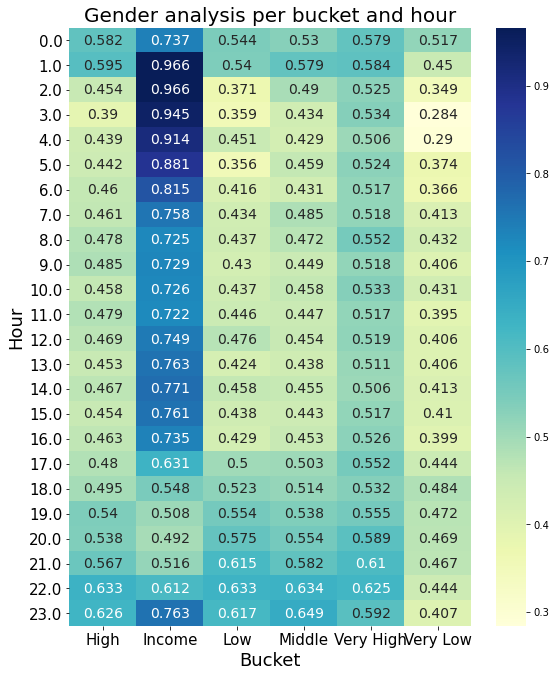

In [64]:
def plot_pivot_table(pivot_table):
    plt.figure(figsize=(9, 11))
    sns.heatmap(pivot_table, cmap="YlGnBu", annot=True, 
                fmt='.3g', annot_kws={"size": 14, "fontsize": 14})
    plt.xticks(fontsize=15)
    plt.yticks(rotation=0, fontsize=15)
    plt.xlabel('Bucket', size=18)
    plt.ylabel('Hour', fontsize=18)
    plt.title('Gender analysis per bucket and hour', fontsize=20)
    plt.show()

plot_pivot_table(frameNew)

#### Task 6:
1. Измените тип поля tr_day на int.
2. Выберите из transactions все MCC коды, которые встретились в выборке более чем 60000 раз.
3. Сгруппируйте отфильтрованный датафрейм по дню и MCC-коду, получая средние значения суммы amount.  
4. Далее отрисуйте зависимость средних сумм (может пригодится метод unstack()) по каждому из MCC-кодов по дням.
5. Выберите верные ответы на вопросы ниже.

#### Вопросы:
    - 1) 2 из полученных MCC-кодов связаны с финансовыми институтами +
    - 2) 2 MCC кода, связанные со снятием наличности имеют в целом разные знаки (в одном случае почти везде - траты, в другом - пополнения) +
    - 3) Бакалейные магазины обладают максимальными средними тратами среди выбранных MCC-кодов
    - 4) Денежные переводы имеют как минимум 3 явных минимума средних +
    - 5) Категория "Звонки с использованием телефонов, считывающих магнитную ленту" имеет визуально очень большую дисперсию. 

In [65]:
# Type your code here
df['tr_day'] = df['tr_datetime'].apply(lambda x: x.split()[0].split(':')[0])
df.head()

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id,gender,mcc_description,tr_description,mcc_code_and_tr_type,max_income,amount_bucket,tr_day
0,39026145,0 10:23:26,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,48141030,NaN,Very Low,0
1,39026145,6 07:08:31,4814,1030,-5614.79,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,48141030,NaN,Low,6
2,39026145,8 07:06:10,4814,1030,-1122.96,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,48141030,NaN,Very Low,8
3,39026145,11 08:49:03,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,48141030,NaN,Very Low,11
4,39026145,11 14:12:08,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,48141030,NaN,Very Low,11


In [71]:
mmc = df['mcc_code'].value_counts().reset_index()
mmc = mmc.query('mcc_code > 60000')
df_end = df.query('mcc_code == 6011 or mcc_code == 6010 or mcc_code == 5411 or mcc_code == 4814 or mcc_code == 4829')
df_end


,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id,gender,mcc_description,tr_description,mcc_code_and_tr_type,max_income,amount_bucket,tr_day
0,39026145,0 10:23:26,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,48141030,NaN,Very Low,0
1,39026145,6 07:08:31,4814,1030,-5614.79,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,48141030,NaN,Low,6
2,39026145,8 07:06:10,4814,1030,-1122.96,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,48141030,NaN,Very Low,8
3,39026145,11 08:49:03,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,48141030,NaN,Very Low,11
4,39026145,11 14:12:08,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,48141030,NaN,Very Low,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
998285,5205423,178 11:31:28,6010,7041,606397.26,NaN,NaN,Финансовые институты — снятие наличности вручную,Перевод на карту (с карты) через POS (из одног...,60107041,3368873.66,Income,178
998286,76606773,370 07:05:51,6010,7041,11319.42,014337,0.0,Финансовые институты — снятие наличности вручную,Перевод на карту (с карты) через POS (из одног...,60107041,3368873.66,Income,370
998287,15854896,109 13:41:04,6010,1000,-44117.20,NaN,1.0,Финансовые институты — снятие наличности вручную,Покупка.ТУ СБ РФ,60101000,NaN,High,109
998295,18654396,440 13:10:22,5411,6210,3897.56,931938,1.0,"Бакалейные магазины, супермаркеты",Возврат покупки.POS Зарубеж. ТУ,54116210,1206764.46,Income,440


In [67]:
qwery = df_end.groupby(['tr_day','mcc_code']).amount.mean().unstack()
qwery

mcc_code,4814,4829,5411,6010,6011
tr_day,,,,,
0,-5631.316489,-214754.866266,-15462.567344,90390.672987,-55388.115175
1,-6375.587685,-158317.573750,-17770.243543,57658.709639,-38938.920557
10,-5389.918248,-228132.640744,-11786.959640,86468.790485,-61714.964187
100,-4781.903545,-194239.654396,-19120.905404,37740.259740,-39384.263698
101,-4855.970763,-168552.888955,-12993.806543,76511.451009,-71570.902418
...,...,...,...,...,...
95,-6011.389778,-95164.485222,-16356.643977,34125.577421,-61171.779236
96,-6170.333992,-300806.325346,-11947.709291,165642.031479,-61565.050328
97,-4466.734959,-194807.377683,-13448.300000,47729.581370,-45838.899178


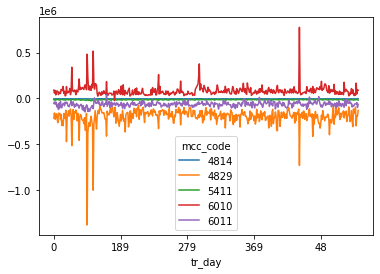

In [73]:
df_end.pivot_table('amount', index='tr_day', columns='mcc_code', aggfunc='mean').plot()

#4814 - звонки с использ телефоно оплата услуги банкоматы
#6010 - финансовые институт снятие наличных
#5411 - бакалейные магазины пос
#4829 -денежные переводы
#6011 - финансовые институты взнос наличных